# OLYMPICS EXPLORATORY DATA ANALYSIS

# About Dataset :
 
  The ‘dataset on the modern Olympic Games’ comprises all the Games from Athens
1986 to Rio 2016. The Olympics is more than just a quadrennial multi-sport
world championship. It is a lens through which to understand global history,
including shifting geopolitical power dynamics, women’s empowerment, and the
evolving values of society.

In this analysis, goal is to shed light on major patterns in Olympic history.
How many athletes, sports, and nations are there? Where do most athletes
come from? Who wins medals? What are the characteristic of the athletes (e.g.,
gender and physical size)?

Olympics data contains 271,116 rows and 17 columns with details of athletes,
events and medals won.

Each row corresponds to an individual athlete competing in an individual
Olympic event (athlete-events). 

# DATA CLEANING AND UNDERSTANDING THE DATA

<b>Installing Required Modules and Libraries

In [19]:
from scipy.stats import norm
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<b>Reading the DataSet File

In [97]:
olympics = pd.read_csv("olympics.csv")

<b>Lets First look at the shape of the Dataset, to get the understanding of the data better

In [99]:
olympics.shape

(271116, 17)

As mentioned in description, it is correct that this dataset have 271116 rows and 17 columns

<b>Lets Look the description of the Dataset for better understanding of Age , Height and Weight

In [100]:
olympics.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


The description  of ID and Year column are not generating any meaningful information for us. So, we can ignore their values

<b>Lets Look at the columns with numerical datatypes

In [101]:
olympics.select_dtypes(include=np.number).columns.tolist()

['ID', 'Age', 'Height', 'Weight', 'Year']

<b>Lets see what all the columns contain null values, if such coulmns are there then we will print it with total number of null values present in respective columns

In [102]:
df = olympics.copy()
newdf = df[df.columns[df.isna().any()]]
lst = []
for i in newdf.columns:
    lst.append(i)
for j in lst:
    print(j,'-', newdf[j].isna().sum())


Age - 9474
Height - 60171
Weight - 62875
Medal - 231333
region - 370
notes - 266077


<b> The columns "Height", "Weight" and "Notes" are not required for further analysis because we are more focused analysis of olympics rather then physical measurements of aheletes and "notes" column is mostly null and not contained any important data.

<b> Let's Drop the Null values of "Age", "Medal" and "region". As, these columns are needed for analysis.

In [103]:
olympics = olympics.drop(['Height','Weight','notes'],axis = 1)
olympics = olympics.dropna(subset=['region'])

olympics.shape

(270746, 14)

We, can see changes after doing droping activity in shape of dataset as number of rows and columns decreased

<b>NOTE : I downloaded the csv file with name "olympics_cleaned". Now, we will bw using that file

In [104]:
olympics = pd.read_csv("olympics_cleaned.csv")

<b>After performing Droping function there are missing values in Medal Column, it can not be droped because it is not possible for every player to win medal. So, lets fill DNW i.e, DO NOT WIN in missing values of medal column

In [105]:
olympics['Medal']=olympics['Medal'].fillna('DNW')

olympics['Medal'].value_counts()

Medal
DNW       230972
Gold       13371
Bronze     13291
Silver     13112
Name: count, dtype: int64

# STATISTICAL ANALYSIS

 As a part of Statistical Analysis, We will answer these questions:
 
1. We have an Age column that contains some null values. Rather than deleting them, fill these missing values by mean after grouping them by games.

2. What is the probability distribution “of the age” of all the players who participated in the swimming competition between the years 2000 - 2016.

3. Is the overall distribution of Gold Medals tally in India, positive or negative skewed?

4. What is the standard deviation/error of the distribution of gold medals when the UK is hosting the Olympic games and when not hosting the games? (When games are hosted in the UK, the city is London.)

5. Standardise the age of all the participants participating in the Shooting Competition and calculate this standardised data's mean and standard deviation.

6. Is age positively correlated or negatively correlated with winning the medal?

7. From the dataset, Calculate the IQR for the Age column

<b>Question 1 : We have an Age column that contains some null values. Rather than deleting them, fill these missing values by mean after grouping them by games and print the mean of age as the output as well.
 

In [106]:
olympics['Age'].fillna(olympics.Age.mean())
round(olympics.Age.mean())

26

<b>Question 2 : What is the probability distribution “of the age” of all the players who participated in the swimming competition between the years 2000 - 2016.

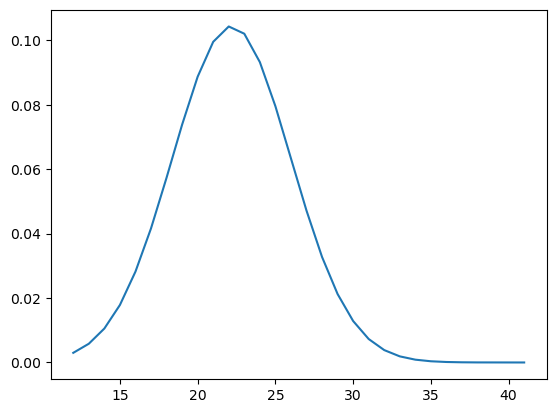

20 to 25


In [107]:
swimming_age = olympics.loc[(olympics["Sport"] == "Swimming") & (olympics["Year"] >= 2000) & (olympics["Year"] <= 2020)]["Age"] 
swimming_age = sorted(swimming_age)
mean_swimming_age = np.mean(swimming_age) 
std_swimming_age = np.std(swimming_age) 
probability_pdf = norm.pdf(swimming_age, loc=mean_swimming_age, scale=std_swimming_age) 
plt.plot(swimming_age, probability_pdf) 
plt.show() 
print("20 to 25")

<b>Question 3 : Find out the skewness of Gold Medal Tally of India</b>

In [108]:
d = olympics
a = d[(d['region'] == 'India') & (d['Medal'] == 'Gold')]
val = a.groupby('Year')['Medal'].value_counts().values
val.sort()
mean = val.mean()
sd = val.std()

if stats.skew(val)>0:
    print('Right Skewed')
else:
    print('Left Skewed')

Left Skewed


<b>Question 4 : What is the standard deviation/error of the distribution of gold medals when the UK is hosting the Olympic games and when not hosting the games? (When games are hosted in the UK, the city is London.)</b>

In [109]:
hosted = olympics[(olympics['region'] == 'UK') & (olympics['City'] == 'London') & (olympics['Medal'] == 'Gold')]
val1 = hosted.groupby('Year')['Medal'].value_counts()

stdev1 = val1.std()
print(stdev1)

not_hosted = olympics[(olympics['region'] == 'UK') & (olympics['City'] != 'London') & (olympics['Medal'] == 'Gold')]
val2 = not_hosted.groupby('Year')['Medal'].value_counts()

stdev2 = val2.std()
print(stdev2)

71.97453253292676
18.14528124684469


<b>Question 5 :  Calculate this standardised data's mean and standard deviation. After, Standardise the age of all the participants participating in the Shooting Competition.

In [110]:
Standardised_data = olympics[(olympics['Sport'] == 'Shooting')]
Standardised_data['Age'] =((Standardised_data['Age']) - (Standardised_data['Age'].mean())) / (Standardised_data['Age'].std())

mean = Standardised_data['Age'].mean()
std = Standardised_data.Age.std()
print(round(mean))
print(round(std))

0
1


C:\Users\Luckshaya Kem\AppData\Local\Temp\ipykernel_29620\1132007454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Standardised_data['Age'] =((Standardised_data['Age']) - (Standardised_data['Age'].mean())) / (Standardised_data['Age'].std())


<b>Question 6 : Is Age positively correlated or negatively correlated with winning the medal?

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('olympics.csv')

# Create a binary variable 'WonMedal' (1 if won a medal, 0 if didn't win)
df['Won_Medal'] = df['Medal'].apply(lambda x: 1 if x == 'Gold' or x == 'Silver' or x == 'Bronze' else 0)

# Calculate the correlation coefficient between 'Age' and 'WonMedal'
correlation = df['Age'].corr(df['Won_Medal'])

# Determine if the correlation is positive or negative
result = "Positive" if correlation > 0 else "Negative"

# Print the result
print(result)


Positive


<b>Question 7 : Calculate the IQR for the Age column.

In [18]:
df = pd.read_csv('olympics_cleaned.csv')
age = df['Age']

# Calculate the first quartile (Q1) and third quartile (Q3)
q1 = age.quantile(0.25)
q3 = age.quantile(0.75)

# Calculate the Interquartile Range (IQR)
iqr = q3 - q1

# Print the IQR value
print(iqr)

6.0


# DATASET VISUALIZATION

As a part of Dataset Visualization, We will answer these questions:

1. Which sport is having the most number of medals so far?
2. Which player has won the most number of Gold Medals of medals?
3. Which event is most popular in terms of the number of players?
4. Which event is most popular in terms of the number of players?
5. Which sport is having the most female Gold Medalists?


<b>Question 1 : Which sport is having the most number of medals so far? First plot the bar chart to find out the top 5 sports that have the most number of medals and then print the sport having the highest medals.

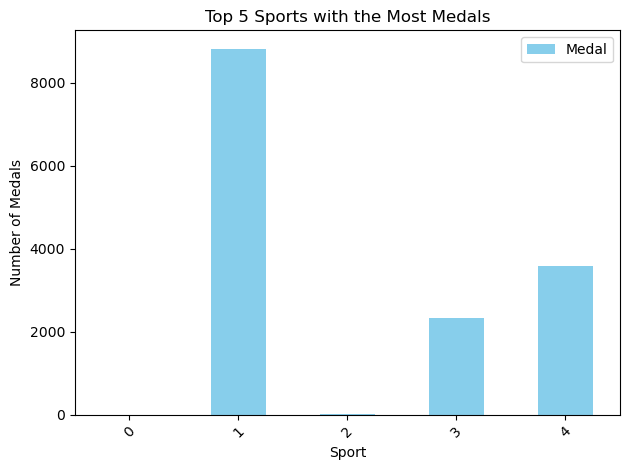

Athletics


In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

df = pd.read_csv('olympics_cleaned.csv')
sport_medals = df.groupby('Sport')['Medal'].count().reset_index()

# Sort by the number of medals in descending order
top_sports = sport_medals.sort_values(by='Medal', ascending=False).head(5)

# Plot the bar chart for the top 5 sports
top_5 = sport_medals.head(5)
top_5.plot(kind='bar', color='skyblue')
plt.title('Top 5 Sports with the Most Medals')
plt.xlabel('Sport')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Find the sport with the highest number of medals
sport_with_most_medals = top_sports.iloc[0]['Sport']
print(sport_with_most_medals)


<b>Question 2 : Which Sport has the most number of Gold Medals so far? First plot the bar chart to find out the top 5 sports that have the most number Gold of medals and then print the sport having the highest number of Gold medals.

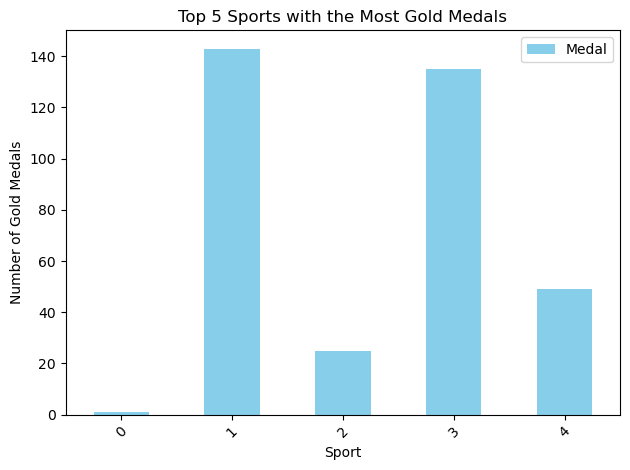

Athletics


In [33]:
df = pd.read_csv('olympics_cleaned.csv')
gold_medals_df = df[df['Medal'] == 'Gold']

# Group by sport and count the number of gold medals
sport_gold_medals = gold_medals_df.groupby('Sport')['Medal'].count().reset_index()

# Sort by the number of gold medals in descending order
top_gold_sports = sport_gold_medals.sort_values(by='Medal', ascending=False).head(5)
top_5 = sport_gold_medals.head(5)
top_5.plot(kind='bar', color='skyblue')
plt.title('Top 5 Sports with the Most Gold Medals')
plt.xlabel('Sport')
plt.ylabel('Number of Gold Medals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Find the sport with the highest number of gold medals
sport_with_most_gold_medals = top_gold_sports.iloc[0]['Sport']
print(sport_with_most_gold_medals)

<b> Question 3 : In which year did India win the first Gold Medal in the Olympics?

In [36]:
df = pd.read_csv('olympics_cleaned.csv')


india_gold = df[(df['region'] == 'India') & (df['Medal'] == 'Gold')]

# Find the earliest year of winning a gold medal
first_gold_year = india_gold['Year'].min()

print(first_gold_year)

1924


<b>Question 4 : Which event is most popular in terms of the number of players? First plot the bar chart to find out the top 5 sports that have the most number of participants and then print the sport having the highest number of players participating.

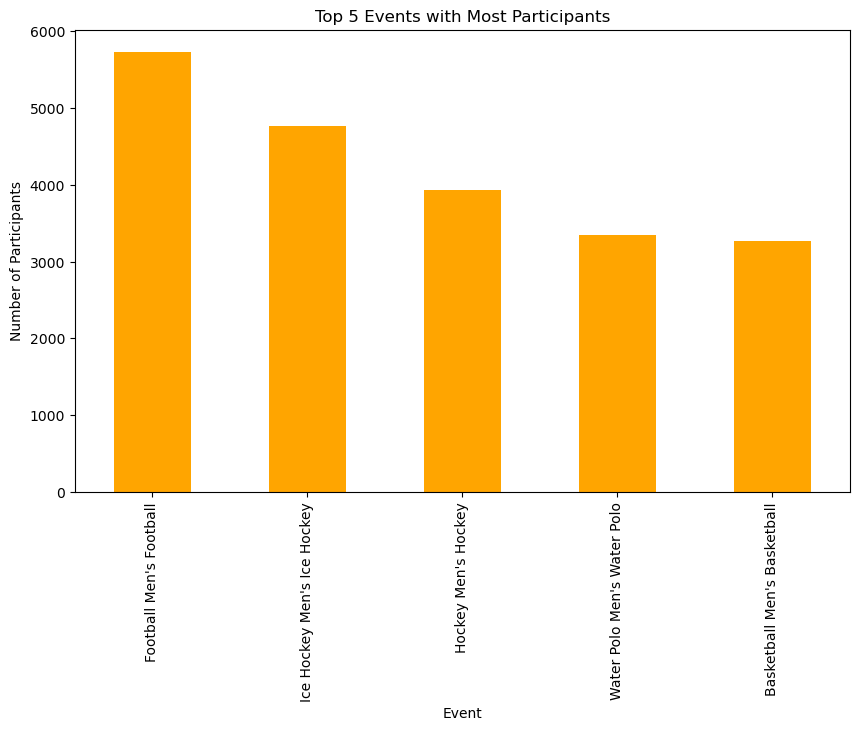

Football Men's Football


In [38]:
df = pd.read_csv('olympics_cleaned.csv')
event_participants = df.groupby('Event')['Name'].count()
k = event_participants.sort_values(ascending = False)
top_events = event_participants.nlargest(5)
top_events.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Top 5 Events with Most Participants')
plt.xlabel('Event')
plt.ylabel('Number of Participants')
plt.show()
print(k.index[0])

<b> Question 5 : Which sport is having the most female Gold Medalists? First plot the bar chart to find out the top 5 sports that have the most female Gold Medalists and then print the sport having the most female Gold Medalists.

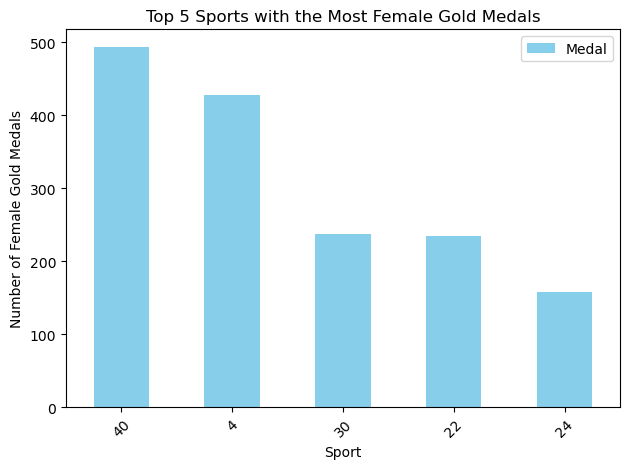

Swimming


In [40]:
df = pd.read_csv('olympics_cleaned.csv')
female_gold_df = df[(df['Sex'] == 'F') & (df['Medal'] == 'Gold')]

# Group by sport and count the number of female gold medalists
sport_female_gold_medals = female_gold_df.groupby('Sport')['Medal'].count().reset_index()


# Sort by the number of female gold medalists in descending order
top_female_gold_sports = sport_female_gold_medals.sort_values(by='Medal', ascending=False).head(5)


top_female_gold_sports.plot(kind='bar', color='skyblue')
plt.title('Top 5 Sports with the Most Female Gold Medals')
plt.xlabel('Sport')
plt.ylabel('Number of Female Gold Medals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Find the sport with the most female gold medalists
sport_with_most_female_gold_medalists = top_female_gold_sports.iloc[0]['Sport']
print(sport_with_most_female_gold_medalists)